# Librerias

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models.kmeans_optimization import KMeansClustering as KMeansOriginal
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score, mutual_info_score


# Cargando data

In [64]:
csv_path = './procesed-data/reduced/rp/r21d-cleaned.csv'
data_r21d = pd.read_csv(csv_path, header=None)
data_r21d = data_r21d.to_numpy()

csv_path = './procesed-data-validation/reduced/rp/r21d-cleaned.csv'
data_r21d_validation = pd.read_csv(csv_path, header=None)
data_r21d_validation = data_r21d_validation.to_numpy()

csv_path = './procesed-data/reduced/rp/s3d-cleaned.csv'
data_s3d = pd.read_csv(csv_path, header=None)
data_s3d = data_s3d.to_numpy()

csv_path = './procesed-data-validation/reduced/rp/s3d-cleaned.csv'
data_s3d_validation = pd.read_csv(csv_path, header=None)
data_s3d_validation = data_s3d_validation.to_numpy()

csv_path = './data/val_subset_10.csv'
val_subset_10 = pd.read_csv(csv_path, header=0)

# Kmeans & r21d

In [65]:
csv_path = './procesed-data-validation/full/r21d.csv'
labels = pd.read_csv(csv_path, header=0)
labels = labels['Filename']
labels = labels.str.split('_').str[0]

In [66]:
filtered_df = pd.DataFrame(columns=val_subset_10.columns)

for label in labels:
    row = val_subset_10[val_subset_10['youtube_id'] == label]
    filtered_df = pd.concat([filtered_df, row], ignore_index=True)

In [67]:
encoder = LabelEncoder()
filtered_df['label_encoded'] = encoder.fit_transform(filtered_df['label'])
real_labels = filtered_df['label_encoded']
real_labels_array = real_labels.to_numpy()

In [68]:
k=10
kmeans_original = KMeansOriginal(n_clusters=k, random_state=42)
kmeans_original.fit(data_r21d, max_iterations=200)
predict_r21d = kmeans_original.predict(data_r21d_validation)
score = adjusted_rand_score(real_labels_array, predict_r21d)
print("Adjusted Rand Score:", score)

Adjusted Rand Score: 0.7425453822861222


In [69]:

score_ars = adjusted_rand_score(real_labels_array, predict_r21d)

score_silhouette = silhouette_score(data_r21d_validation, predict_r21d)

score_mi = mutual_info_score(real_labels_array, predict_r21d)

# Creando un DataFrame de pandas para mostrar los resultados
results = pd.DataFrame({
    'Metric': ['Adjusted Rand Score', 'Silhouette Score', 'Mutual Information'],
    'Score': [score_ars, score_silhouette, score_mi]
})

print(results.to_string(index=False))


             Metric    Score
Adjusted Rand Score 0.742545
   Silhouette Score 0.048014
 Mutual Information 1.865523


Adjusted Rand Score con max_iter=1: 0.38783333899316597
Adjusted Rand Score con max_iter=2: 0.583274423478872
Adjusted Rand Score con max_iter=3: 0.5755844628222232
Adjusted Rand Score con max_iter=4: 0.5833855938542828
Adjusted Rand Score con max_iter=5: 0.6094357951772085
Adjusted Rand Score con max_iter=6: 0.6166228195596939
Adjusted Rand Score con max_iter=7: 0.6132771606102296
Adjusted Rand Score con max_iter=8: 0.610475582169395
Adjusted Rand Score con max_iter=9: 0.610475582169395
Adjusted Rand Score con max_iter=10: 0.6018577587539505
Adjusted Rand Score con max_iter=11: 0.6001083330260518
Adjusted Rand Score con max_iter=12: 0.5883422142484429
Adjusted Rand Score con max_iter=13: 0.5789610775676232
Adjusted Rand Score con max_iter=14: 0.5550493499218323
Adjusted Rand Score con max_iter=15: 0.5493951249998772
Adjusted Rand Score con max_iter=16: 0.646242386358758
Adjusted Rand Score con max_iter=17: 0.7401961929094343
Adjusted Rand Score con max_iter=18: 0.7482548174906785
Adju

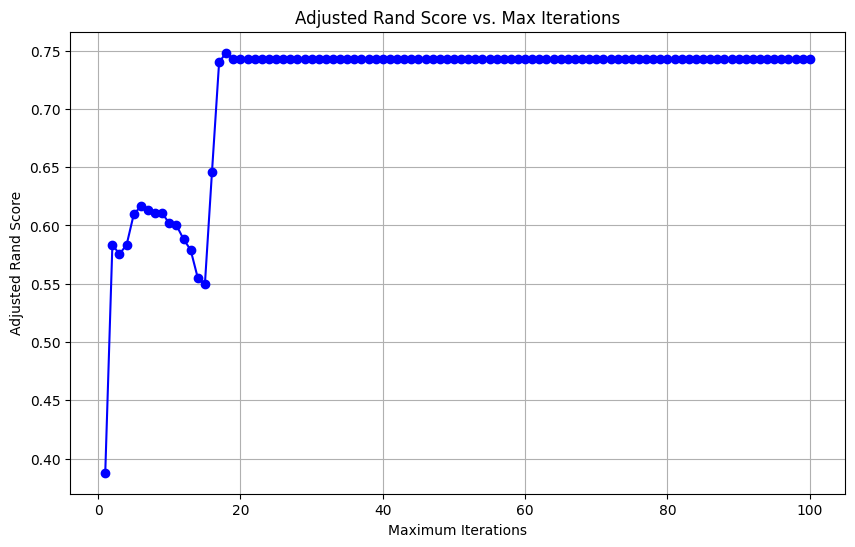

In [70]:
k = 10
iteration_steps = []
scores = []

for max_iter in range(1, 101, 1):
    kmeans_original = KMeansOriginal(n_clusters=k, random_state=42)
    kmeans_original.fit(data_r21d, max_iterations=max_iter)  
    predict_r21d = kmeans_original.predict(data_r21d_validation)  
    score = adjusted_rand_score(real_labels_array, predict_r21d) 
    scores.append(score) 
    iteration_steps.append(max_iter)
    print(f"Adjusted Rand Score con max_iter={max_iter}: {score}")

results_df = pd.DataFrame({
    'Max Iterations': iteration_steps,
    'ARS-RP-R21D': scores
})

results_df.to_csv('./experiments-results/ARS-RP-R21D.csv', index=False)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(iteration_steps, scores, marker='o', linestyle='-', color='b')
plt.title('Adjusted Rand Score vs. Max Iterations')
plt.xlabel('Maximum Iterations')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.show()

# Kmeans & s3d

In [71]:
csv_path = './procesed-data-validation/full/s3d.csv'
labels = pd.read_csv(csv_path, header=0)
labels = labels['Filename']
labels = labels.str.split('_').str[0]

In [72]:
filtered_df = pd.DataFrame(columns=val_subset_10.columns)

for label in labels:
    row = val_subset_10[val_subset_10['youtube_id'] == label]
    filtered_df = pd.concat([filtered_df, row], ignore_index=True)

In [73]:
encoder = LabelEncoder()
filtered_df['label_encoded'] = encoder.fit_transform(filtered_df['label'])
real_labels = filtered_df['label_encoded']
real_labels_array = real_labels.to_numpy()

In [74]:
k=10
kmeans_original = KMeansOriginal(n_clusters=k, random_state=42)
kmeans_original.fit(data_s3d, max_iterations=200)
predict_s3d = kmeans_original.predict(data_s3d_validation)
score = adjusted_rand_score(real_labels_array, predict_s3d)
print("Adjusted Rand Score:", score)

Adjusted Rand Score: 0.04682943683268627


In [75]:
score_ars = adjusted_rand_score(real_labels_array, predict_s3d)

score_silhouette = silhouette_score(data_s3d_validation, predict_s3d)

score_mi = mutual_info_score(real_labels_array, predict_s3d)

results = pd.DataFrame({
    'Metric': ['Adjusted Rand Score', 'Silhouette Score', 'Mutual Information'],
    'Score': [score_ars, score_silhouette, score_mi]
})

print(results.to_string(index=False))

             Metric    Score
Adjusted Rand Score 0.046829
   Silhouette Score 0.113078
 Mutual Information 0.467136


Adjusted Rand Score con max_iter=1: 0.013360562009267279


Adjusted Rand Score con max_iter=2: 0.014526234350577939
Adjusted Rand Score con max_iter=3: 0.015266312840909475
Adjusted Rand Score con max_iter=4: 0.01610939921808679
Adjusted Rand Score con max_iter=5: 0.01781375868454675
Adjusted Rand Score con max_iter=6: 0.02042792021088974
Adjusted Rand Score con max_iter=7: 0.022830418910916313
Adjusted Rand Score con max_iter=8: 0.023397410998037528
Adjusted Rand Score con max_iter=9: 0.036705548792397576
Adjusted Rand Score con max_iter=10: 0.045462984424870116
Adjusted Rand Score con max_iter=11: 0.048086233078365334
Adjusted Rand Score con max_iter=12: 0.0530614851958681
Adjusted Rand Score con max_iter=13: 0.05631768608810406
Adjusted Rand Score con max_iter=14: 0.05815287195665518
Adjusted Rand Score con max_iter=15: 0.06036303761490442
Adjusted Rand Score con max_iter=16: 0.06036303761490442
Adjusted Rand Score con max_iter=17: 0.06004043570777938
Adjusted Rand Score con max_iter=18: 0.05785685615951307
Adjusted Rand Score con max_iter=

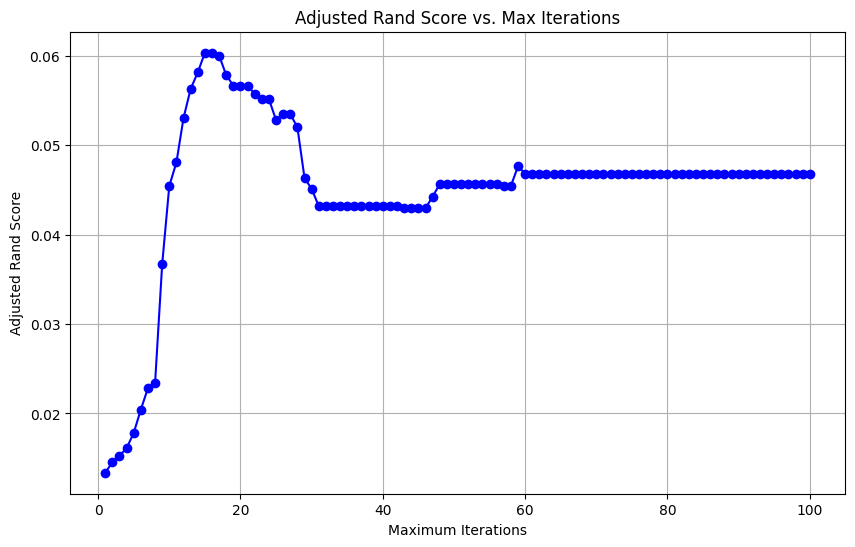

In [76]:
k = 10
iteration_steps = []
scores = []

for max_iter in range(1, 101, 1):
    kmeans_original = KMeansOriginal(n_clusters=k, random_state=42)
    kmeans_original.fit(data_s3d, max_iterations=max_iter)  
    predict_s3d = kmeans_original.predict(data_s3d_validation)  
    score = adjusted_rand_score(real_labels_array, predict_s3d) 
    scores.append(score) 
    iteration_steps.append(max_iter)
    print(f"Adjusted Rand Score con max_iter={max_iter}: {score}")

results_df = pd.DataFrame({
    'Max Iterations': iteration_steps,
    'ARS-RP-S3D': scores
})

results_df.to_csv('./experiments-results/ARS-RP-S3D.csv', index=False)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(iteration_steps, scores, marker='o', linestyle='-', color='b')
plt.title('Adjusted Rand Score vs. Max Iterations')
plt.xlabel('Maximum Iterations')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.show()
